# The k-armed bandit problem

![k-armed_bandit](../images/lecture_2/k_armed_bandit.png)

**Your task is to calculate the expected reward with the $\epsilon$-greedy algorithm**

## The $\epsilon$-greedy algorithm

![epsilon_greedy](../images/lecture_2/epsilon_greedy.png)

## The action model

In [1]:
import numpy as np


class Action:
    def __init__(self, m: int) -> None:
        self.q = 0.0
        self.m = m

    def update(self, n: int, r: float) -> None:
        self.q = self.q+1.0/n*(r-self.q)

    def reward(self) -> float:
        return np.random.randn()+self.m

    def get_q(self) -> float:
        return self.q


## Run the code

In [2]:
from typing import List


def run_simulation(num_runs: int, num_choose: int, actions: List[Action], num_actions: int, epsilon: float):
    rs = []
    for _ in range(num_runs):
        t_rs = [0.0]
        for n in range(1, num_choose+1):
            p_choose = np.random.random()
            if p_choose <= epsilon:
                idx = np.random.choice(num_actions)
            else:
                idx = np.argmax([action.get_q() for action in actions])
            reward = actions[idx].reward()
            actions[idx].update(n, reward)
            t_rs.append(t_rs[-1]+1.0/n*(reward-t_rs[-1]))
        rs.append(t_rs)
    return np.average(rs, 0)


In [3]:
num_actions = 10
num_runs = 10
num_choose = 1000
epsilons = np.arange(0,0.4,0.05)
results = {}
actions = [Action(m) for m in range(1, num_actions+1)]
for e in epsilons:
    results[e] = run_simulation(num_runs, num_choose, actions, num_actions, e)


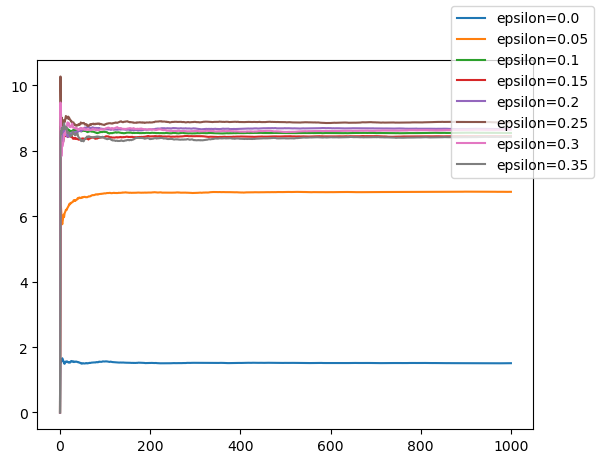

In [4]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
for epsilon,result in results.items():
    ax.plot(result,label="epsilon="+str(round(epsilon,2)))
fig.legend()

**We can figure out that the max reward gained when the agent is willing to try other actions with probability about 0.2**